In [75]:
import numpy as np
import pandas as pd
df=pd.read_csv('student_data.csv')
df.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [76]:
# Importing matplotlib
import matplotlib.pyplot as plt

def plot_data_points(data):
    X=np.array(data[['gre', 'gpa']])
    y=np.array(data['admit'])
    accepted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]    
    # data is like rejected = [[[a b]]] where a = s[0][0] and b = s[0][1]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, c='r', edgecolor='k')
    plt.scatter([s[0][0] for s in accepted], [s[0][1] for s in accepted], s=25, c='b', edgecolor='k')
    plt.xlabel('GRE score')
    plt.ylabel('GPA')

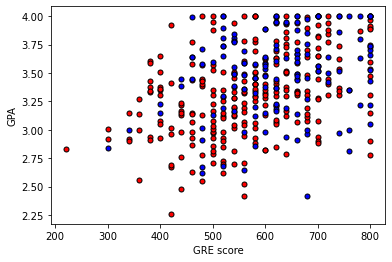

In [77]:
plot_data_points(df)
plt.show()

for Rank 1


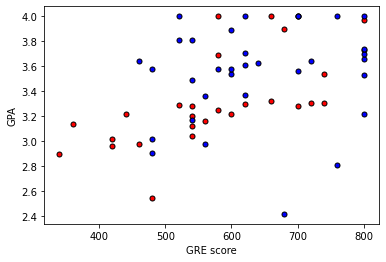

for Rank 2


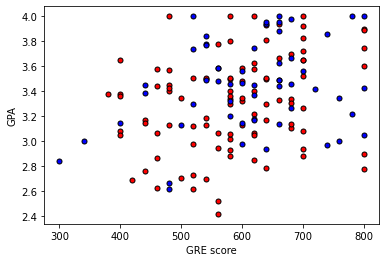

for Rank 3


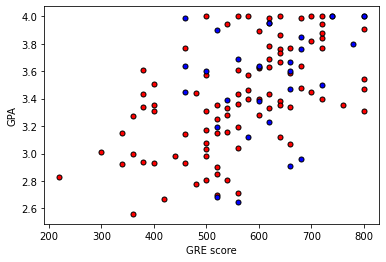

for Rank 4


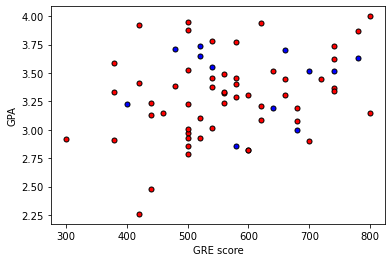

In [78]:
data_rank_1 = df[df['rank']==1]
data_rank_2 = df[df['rank']==2]
data_rank_3 = df[df['rank']==3]
data_rank_4 = df[df['rank']==4]
print('for Rank 1')
plot_data_points(data_rank_1)
plt.show()
print('for Rank 2')
plot_data_points(data_rank_2)
plt.show()
print('for Rank 3')
plot_data_points(data_rank_3)
plt.show()
print('for Rank 4')
plot_data_points(data_rank_4)
plt.show()



In [79]:
df_1 =df
df.head()


,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [80]:
df['rank_1']=np.where(df['rank']==1,1,0)
df['rank_2']=np.where(df['rank']==2,1,0)
df['rank_3']=np.where(df['rank']==3,1,0)
df['rank_4']=np.where(df['rank']==4,1,0)

In [81]:
df = df.drop('rank', axis = 1)

In [82]:
df['gre']=df['gre']/800
df['gpa']=df['gpa']/4.0
df.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1


In [83]:
s= np.random.choice(df.index, size=int(len(df)*0.85), replace=False)
train_date, test_data = df.iloc[s], df.drop(s)

In [84]:
train_feature=np.array(train_data.drop('admit', axis=1))
train_target=np.array(train_data['admit'])
test_feature=np.array(test_data.drop('admit', axis=1))
test_target=np.array(test_data['admit'])

In [85]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical

train_target = to_categorical(train_target)
test_target = to_categorical(test_target)

model = Sequential()
model.add(Dense(128, input_shape=(6,)))
model.add(Activation('sigmoid'))
model.add(Dense(32))
model.add(Activation('sigmoid'))
model.add(Dense(2))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               896       
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 32)                4128      
_________________________________________________________________
activation_11 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 66        
_________________________________________________________________
activation_12 (Activation)   (None, 2)                 0         
Total params: 5,090
Trainable params: 5,090
Non-trainable params: 0
____________________________________________________

In [89]:
history = model.fit(train_feature, train_target, batch_size=100, epochs=1000, verbose=0)


In [91]:
score = model.evaluate(train_feature, train_target)
print("\n Training Accuracy:", score[1])
score = model.evaluate(test_feature, test_target)
print("\n Testing Accuracy:", score[1])

340/340 [==============================] - 0s 47us/step

 Training Accuracy: 0.7058823704719543
60/60 [==============================] - 0s 133us/step

 Testing Accuracy: 0.6833333373069763
